## Agents and Inteligence

In this tutorial, we think classifiers as agents. When we have enough experience we will discuss how to embed classifiers into the mind of agents.

We start with a toy example, composed of 50 instances. Data has two hypothetical features, feature0 and feature1. 

 - **40 negative examples**: low values for both features
 - **10 positive examples**: high values for both features
  
We want our classifiers to distinguish positive examples from negative examples.

# Generate Data

In [1]:
import numpy as np
n_negative, n_positive = 40, 10

X_negative = np.random.randint(low=0, high =10, size=(n_negative,2))
X_positive = np.random.randint(low=90, high =100, size=(n_positive,2))

y_negative, y_positive = np.zeros(n_negative), np.ones(n_positive)

X = np.concatenate((X_negative, X_positive))
y = np.concatenate((y_negative, y_positive))
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [2]:
np.shape(X)

(50, 2)

In [3]:
actual = {0: "negative", 1:"positive"}
actual

{0: 'negative', 1: 'positive'}

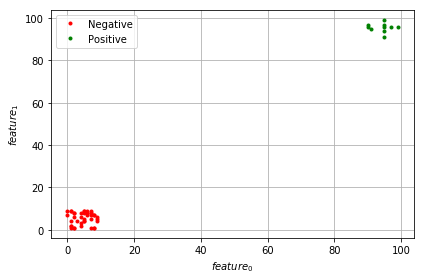

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_negative[:,0],X_negative[:,1], "o",  markersize=3, color='red', label="Negative")
plt.plot(X_positive[:,0],X_positive[:,1],"o",  markersize=3, color='green', label="Positive")
plt.xlabel("$feature_0$");plt.ylabel("$feature_1$"); plt.grid(); plt.legend()
plt.tight_layout()

# Split Data into train and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [6]:
X_test

array([[ 5,  5],
       [ 8,  7],
       [ 8,  1],
       [95, 94],
       [ 6,  8],
       [ 0,  7],
       [ 2,  8],
       [95, 97],
       [91, 95],
       [ 4,  3]])

In [7]:
y_test

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.])

In [8]:
y_values = [actual[val] for val in y_test]
y_values

['negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative']

## Data Preprocssing: 
Normalize data with feature preprocessing using minmax scaling

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[ 0.05050505,  0.04081633],
       [ 0.08080808,  0.06122449],
       [ 0.08080808,  0.        ],
       [ 0.95959596,  0.94897959],
       [ 0.06060606,  0.07142857],
       [ 0.        ,  0.06122449],
       [ 0.02020202,  0.07142857],
       [ 0.95959596,  0.97959184],
       [ 0.91919192,  0.95918367],
       [ 0.04040404,  0.02040816]])

## First Classifier
A dumb one!

In [11]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test_scaled)
y_dummy_predictions

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [12]:
predictions = [actual[p] for p in y_dummy_predictions]
predictions

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

## Evaluation with Confusion Matrix

|Predicted Negative|Predicted Positive
--- | --- | --- 
** Actual Negative**|TP|FN
** Actual Positive**|FN|TN

Look at the figure
- Postive: Pregnant
- Negative: Not Pregnant

<p align="center">
  <img src="figures/confusionmatrix.jpg" width="350"/>
</p>


In [13]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_dummy_predictions)
confusion

array([[7, 0],
       [3, 0]])

## Try Different Machine Learning Algorithms.
With Sklearn it is very easy.

### Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_test_scaled)

confusion = confusion_matrix(y_test, lr_predictions)
confusion

array([[7, 0],
       [0, 3]])

### Decison Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train_scaled, y_train)
dtc_predicitions = dtc.predict(X_test_scaled)

confusion = confusion_matrix(y_test, dtc_predicitions)
confusion

array([[7, 0],
       [0, 3]])

### K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_scaled, y_train)
knn_predicitions = knn.predict(X_test_scaled)

confusion = confusion_matrix(y_test, knn_predicitions)
confusion

array([[7, 0],
       [0, 3]])

## Supervised Learning

In [17]:
from sklearn import datasets
import pandas as pd
plt.style.use('ggplot')

### Load dataset

In [23]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [46]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

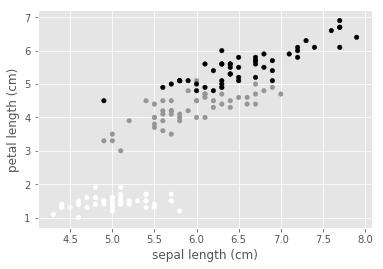

In [41]:
df.plot.scatter(x='sepal length (cm)', y = 'petal length (cm)', c=y)

## Classification with KNN on iris data

In [43]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Scale Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_scaled, y_train)
knn_predicitions = knn.predict(X_test_scaled)

# Evaluate performance
confusion = confusion_matrix(y_test, knn_predicitions)
confusion

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

## Classification with KNN on MINST handwritten dataset


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

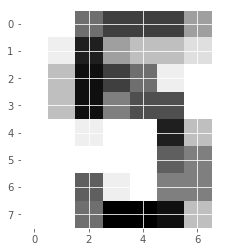

In [49]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [55]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test,y_test))

0.983333333333


In [56]:
np.arange(1, 9)

array([1, 2, 3, 4, 5, 6, 7, 8])

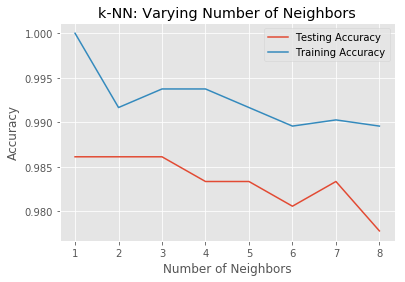

In [58]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()